In [234]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [235]:
data = {
    'colors': {
        0: 'black',
        1: 'darkorange',
        2: 'purple',
        3: 'beige',
        4: 'red',
        5: 'gray',
        6: 'lime',
        7: 'yellow',
        8: 'blue',
        9: 'skyblue',
        10: 'moccasin',
        11: 'pink',
        12: 'green'
    }
}

def render(shapes):
    field = np.zeros(5*11)
    field.shape = (5, 11)
    index = 1
    for shape in shapes:
        for p in shape:
            field[p[0], p[1]] = index
        index += 1
    plt.matshow(field)  
    # s = np.ones(8)*3000
    # c = [data['colors'][t] for t in range(13)]
    # plt.scatter(data['field'], data['field'], s=s, c=c, alpha=0.8)
    # plt.grid(True)
    

shapes = [
    np.array([[0,0],[0,1],[1,0]]),
    np.array([[0,0],[1,0],[1,1],[1,2]]),
    np.array([[0,0],[0,-1],[-1,0],[0,1],[1,0]]),
    np.array([[0,0],[0,1],[0,2],[0,3],[1,1]]),
    np.array([[0,0],[0,1],[1,1],[1,2],[2,2]]),
    np.array([[0,0],[0,1],[0,2],[1,2],[1,3]]),
    np.array([[0,0],[0,1],[0,2],[0,3],[1,0]]),
    np.array([[0,0],[0,1],[0,2],[0,3]]),
    np.array([[0,0],[0,1],[0,2],[1,0],[1,1]]),
    np.array([[0,0],[0,1],[0,2],[1,0],[1,2]]),
    np.array([[0,0],[0,1],[1,0],[1,1]]),
    np.array([[0,0],[0,1],[0,2],[1,0],[2,0]])
]

def rotate_right(shape):
    transform(shape, [[0,1],[-1,0]])

def rotate_left(shape):
    transform(shape, [[0,-1],[1,0]])

def flip(shape):
    transform(shape, [[1,0],[0,-1]])

def move_down(shape, step=1):
    for i in range(len(shape)):
        shape[i] = shape[i] + [step,0]

def move_up(shape, step=1):
    for i in range(len(shape)):
        shape[i] = shape[i] - [step,0]
        
def move_right(shape, step=1):
    for i in range(len(shape)):
        shape[i] = shape[i] + [0,1]
        
def move_left(shape, step=1):
    for i in range(len(shape)):
        shape[i] = shape[i] - [0,1]
             
def transform(shape, M_def_t):
    M = np.array(M_def_t).transpose()
    for i in range(len(shape)):
        shape[i] = M.dot(shape[i])


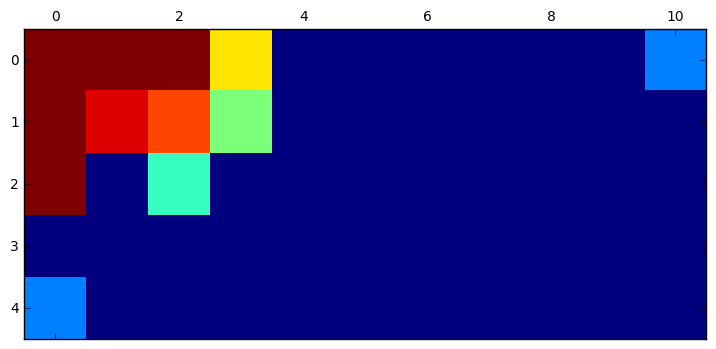

In [236]:
def solve(shapes):
    field = np.zeros(5*11)
    field.shape = (5, 11)
    
    render(shapes)

solve(shapes)